In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = sns.load_dataset("mpg")

X_train, y_train = df[~df["horsepower"].isna()][["displacement", "acceleration"]], df[~df["horsepower"].isna()]["horsepower"]
X_pred = df[df["horsepower"].isna()][["displacement", "acceleration"]]

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_pred)
y_pred = np.round(y_pred)
df.loc[X_pred.index, "horsepower"] = y_pred
df = pd.get_dummies(df.drop("name", axis = 1), columns = ["origin"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [3]:
X, y = df.drop(["mpg"], axis = 1).values, df["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [4]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [5]:
from evolutionary_algos import VectorizedEvoRegressor, EvoRegressor

In [20]:
#regressor = EvoRegressor(n = 100, hidden_layers = [25], activation = "relu", random_state = 42)
regressor = VectorizedEvoRegressor(n = 8, hidden_layers = [8], activation = "relu", random_state = 42)


regressor.fit(scaled_X_train, y_train, epochs = 10000, validation_data = (scaled_X_val, y_val), verbose = 1)

Epoch 0 - loss: 17.086074252696687 - val_loss: 16.25819567965962
Epoch 28 - loss: 15.269656020308565 - val_loss: 15.261713436423284
Epoch 30 - loss: 13.512452485986596 - val_loss: 12.265590289239608
Epoch 33 - loss: 11.105367345001127 - val_loss: 11.947148778450423
Epoch 35 - loss: 10.448866824107354 - val_loss: 9.926332086789483
Epoch 36 - loss: 8.878861956577772 - val_loss: 8.361624222117566
Epoch 41 - loss: 6.292745587309823 - val_loss: 6.59323823583978
Epoch 49 - loss: 5.947198300607916 - val_loss: 4.899419029631893
Epoch 62 - loss: 5.615150078895194 - val_loss: 4.597698975452506
Epoch 67 - loss: 4.993962371815234 - val_loss: 4.131415879457743
Epoch 75 - loss: 4.741533283933541 - val_loss: 4.853359375333684
Epoch 80 - loss: 4.157711573734203 - val_loss: 3.453433660159843
Epoch 81 - loss: 3.9194176959812084 - val_loss: 3.4334399042711157
Epoch 82 - loss: 3.7652931274717454 - val_loss: 3.0370186248282005
Epoch 83 - loss: 3.6391331202011297 - val_loss: 3.1707870198651458
Epoch 104 - l

Loss on test data: 1.6849793398925432


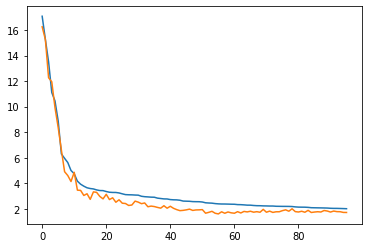

In [21]:
y_pred = regressor.predict(scaled_X_test)
print(f"Loss on test data: {mean_absolute_error(y_test, y_pred)}")

fig, ax = plt.subplots(1, 1)

ax.plot(regressor.training_loss_history)
ax.plot(regressor.validation_loss_history)

plt.show()

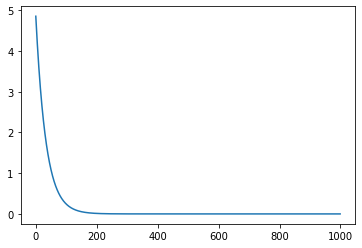

In [9]:
y = []
xrange = 1000

for x in range(1, xrange + 1):
    y.append(5 * 1 / math.exp(x / (xrange / (10 * math.log10(xrange)))))

plt.plot(list(range(xrange)), y)

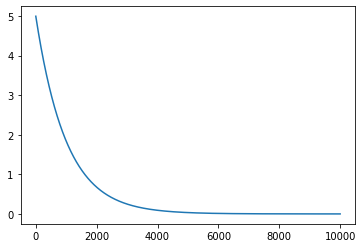

In [10]:
y = []
xrange = 10000

for x in range(1, xrange + 1):
    y.append(5 * 1 / math.exp(x / (xrange / 10)))

plt.plot(list(range(xrange)), y)